In [18]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from CityStreet import CityStreet

In [19]:
import torchvision.transforms as transforms
import torch

PATH = "C:\\Users\\Viyerelu\\Downloads\\CityStreet\\"

transform = transforms.Compose([
    transforms.Resize(512),
])

target_transform = transforms.Compose([
    transforms.GaussianBlur(7, (2, 2)),
])

dataset = CityStreet(PATH, True, 1, target_resize_factor=1520/64, transform=transform, target_transform=target_transform)
dataset_nb = CityStreet(PATH, True, 1, target_resize_factor=1520/64, transform=transform)

idx = 10
img, hmap = dataset[idx]


In [20]:
hmap.sum(), dataset_nb[idx][1].sum(), dataset[idx][1].sum()

(tensor(82.0000), tensor(82.), tensor(82.0000))

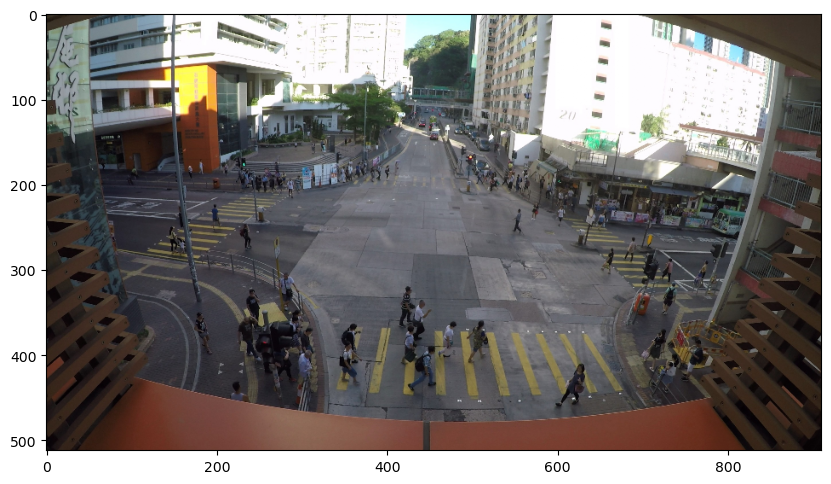

In [21]:
plt.figure(figsize=(10, 10))
plt.imshow(img.permute(1, 2, 0))


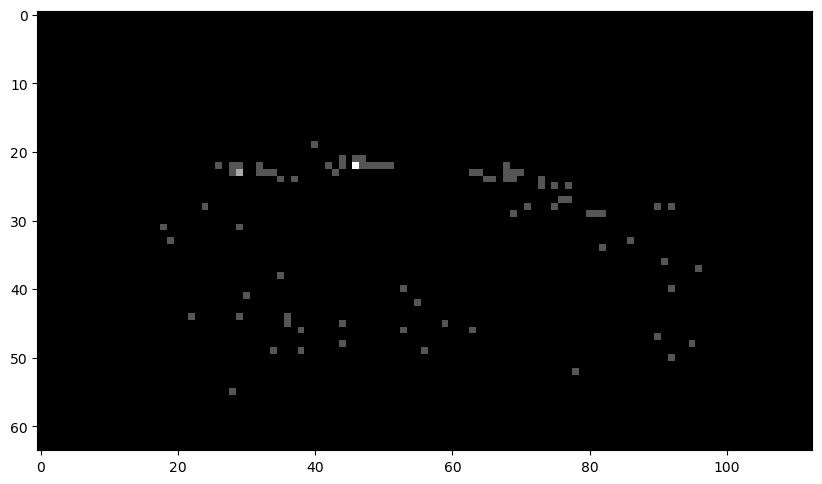

In [22]:
plt.figure(figsize=(10, 10))

plt.imshow((dataset_nb[idx][1]).permute(1, 2, 0), cmap="gray")

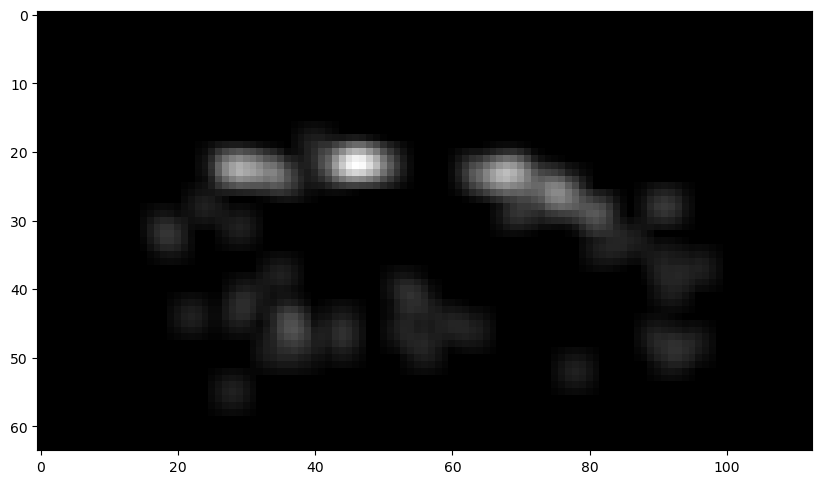

In [23]:
plt.figure(figsize=(10, 10))

plt.imshow((hmap).permute(1, 2, 0), cmap="gray")

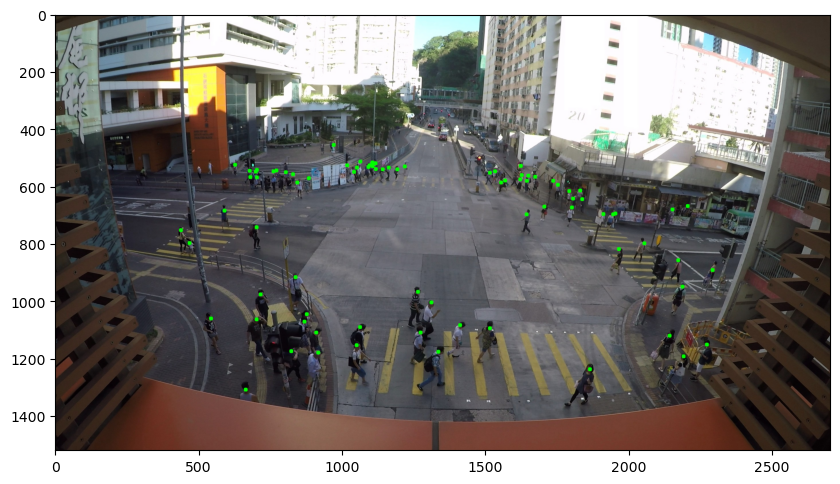

In [24]:
image, pts = dataset.get_original(idx)
img_numpy = image.permute(1, 2, 0).numpy().astype(np.uint8)

for pt in pts:
    cv2.circle(img_numpy, pt, 2, (0, 255, 0), 10)

plt.figure(figsize=(10, 10))
plt.imshow(img_numpy)

In [16]:
dataset_v1_t = CityStreet("C:\\Users\\Viyerelu\\Downloads\\CityStreet", view=1)
dataset_v1_v = CityStreet("C:\\Users\\Viyerelu\\Downloads\\CityStreet", False, view=1)
dataset_v2_t = CityStreet("C:\\Users\\Viyerelu\\Downloads\\CityStreet", view=2)
dataset_v2_v = CityStreet("C:\\Users\\Viyerelu\\Downloads\\CityStreet", False, view=2)
dataset_v3_t = CityStreet("C:\\Users\\Viyerelu\\Downloads\\CityStreet", view=3)
dataset_v3_v = CityStreet("C:\\Users\\Viyerelu\\Downloads\\CityStreet", False, view=3)

concat_dataset = torch.utils.data.ConcatDataset([dataset_v1_t, dataset_v1_v, dataset_v2_t, dataset_v2_v, dataset_v3_t, dataset_v3_v])

total = 0
max_people = 0
min_people = 0

for data in concat_dataset:
    total += data[1].sum()
    if data[1].sum() > max_people:
        max_people = data[1].sum()
    if data[1].sum() < min_people:
        min_people = data[1].sum()

print(max_people, min_people, total, total / len(concat_dataset), len(concat_dataset))

tensor(124.) 0 tensor(83840.) tensor(72.5887) 1155
